In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2022-09-21 21:44:36.399974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Own Model

## iPhone6S_I

In [5]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/calendar-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0234375j 0.015625 -0.0078125j 0.0390625+0.0078125j ...
 0.03125  -0.0078125j 0.015625 -0.015625j  0.03125  -0.0078125j]
2048
79002
(2048, 79002)
[0.02281539 0.01194811 0.00464875 ... 0.00215009 0.00434015 0.0120582 ]
(10000, 2048)
(10000,)


In [6]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j ...
 0.0234375-0.015625j  0.       -0.0078125j 0.0078125-0.0078125j]
2048
83422
(2048, 83422)
[0.02261406 0.01221008 0.00356162 ... 0.00220496 0.00347677 0.01195692]
(20000, 2048)
(20000,)


In [7]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0234375j 0.015625 +0.j        0.015625 -0.015625j  ...
 0.015625 +0.0078125j 0.0078125-0.0234375j 0.015625 -0.0234375j]
2048
91947
(2048, 91947)
[0.02267564 0.01198972 0.00444621 ... 0.00256938 0.00477387 0.01187558]
(30000, 2048)
(30000,)


In [8]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125-0.03125j   0.0234375+0.0078125j 0.0234375-0.015625j  ...
 0.0078125-0.0234375j 0.0390625-0.0078125j 0.0390625-0.015625j ]
2048
91066
(2048, 91066)
[0.02257732 0.01187163 0.0045188  ... 0.00236705 0.0043952  0.01194121]
(40000, 2048)
(40000,)


In [9]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125-0.0078125j 0.0234375+0.j        0.0234375-0.015625j  ...
 0.0078125-0.015625j  0.0234375+0.j        0.015625 -0.03125j  ]
2048
90701
(2048, 90701)
[0.02244814 0.01185012 0.00394583 ... 0.00198221 0.00406967 0.01176537]
(50000, 2048)
(50000,)


In [10]:
# reading a data for class  label 5
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0078125j 0.015625 -0.015625j  0.0234375-0.0078125j ...
 0.015625 -0.0234375j 0.0078125-0.015625j  0.0234375-0.015625j ]
2048
87919
(2048, 87919)
[0.02270209 0.01186435 0.00445565 ... 0.00240018 0.00450414 0.01180683]
(60000, 2048)
(60000,)


In [11]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.       +0.0078125j 0.0078125-0.03125j   0.0234375-0.0078125j ...
 0.       -0.0234375j 0.0234375-0.0078125j 0.0234375-0.015625j ]
2048
84628
(2048, 84628)
[0.02241303 0.01212316 0.00459265 ... 0.00210078 0.00421004 0.0118071 ]
(70000, 2048)
(70000,)


In [12]:
# reading a data for class  label 7
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  -0.015625j  0.015625 -0.0078125j 0.0234375-0.015625j  ...
 0.015625 -0.015625j  0.015625 -0.015625j  0.015625 -0.0234375j]
2048
82874
(2048, 82874)
[0.02339496 0.01292546 0.00451194 ... 0.0022962  0.00445246 0.0126978 ]
(80000, 2048)
(80000,)


In [13]:
# reading a data for class  label 8
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  +0.015625j  0.0234375-0.0390625j 0.015625 -0.0078125j ...
 0.0078125+0.j        0.015625 -0.015625j  0.015625 -0.015625j ]
2048
77095
(2048, 77095)
[0.02247975 0.01181555 0.00433592 ... 0.00227707 0.00459107 0.01169153]
(90000, 2048)
(90000,)


In [14]:
# reading a data for class  label 9
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_6S/iPhone6S_I/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0234375j 0.0234375-0.0078125j 0.015625 -0.03125j   ...
 0.0234375-0.0078125j 0.015625 +0.j        0.0390625-0.0078125j]
2048
75926
(2048, 75926)
[0.02247547 0.01193508 0.00450019 ... 0.00231793 0.00458043 0.01185459]
(100000, 2048)
(100000,)


Build a model for iPhone6S_I

In [15]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2022-09-21 21:51:17.893805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [17]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 27s 10ms/step - loss: 2.2472 - accuracy: 0.2553 - val_loss: 2.1573 - val_accuracy: 0.4262
Epoch 2/25
2532/2532 [==============================] - 24s 9ms/step - loss: 1.8175 - accuracy: 0.5713 - val_loss: 1.3480 - val_accuracy: 0.7106
Epoch 3/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.9273 - accuracy: 0.8282 - val_loss: 0.6528 - val_accuracy: 0.8597
Epoch 4/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.4542 - accuracy: 0.9180 - val_loss: 0.3302 - val_accuracy: 0.9358
Epoch 5/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.2472 - accuracy: 0.9586 - val_loss: 0.1795 - val_accuracy: 0.9727
Epoch 6/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.1548 - accuracy: 0.9771 - val_loss: 0.1195 - val_accuracy: 0.9841
Epoch 7/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.1090 - accuracy: 0.9858 - val_loss: 0.0955 - val_a

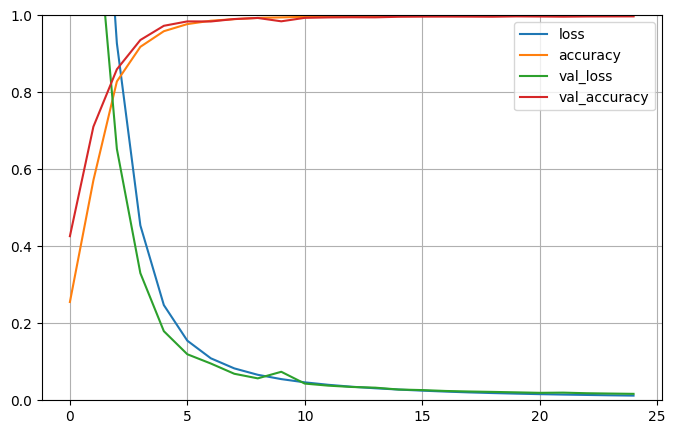

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone13_I model

In [20]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")

In [21]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9971
test loss, test acc: [0.023971812799572945, 0.9970999956130981]


In [22]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1008    2    1    0    0    0    0    0    0    0]
 [   2 1006    0    0    0    0    1    1    0    0]
 [   0    0  990    1    0    2    0    0    0    0]
 [   0    1    0  938    0    0    0    0    0    0]
 [   0    0    0    2 1037    1    2    0    1    0]
 [   0    0    1    1    1 1024    0    0    0    0]
 [   0    0    0    0    0    0  998    0    0    1]
 [   0    0    0    0    0    0    0  972    0    2]
 [   0    0    1    0    0    0    2    0  999    1]
 [   0    0    0    0    0    0    1    1    0  999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      0.99      1.00      1043
           5       1.00      1.00      1.00      1027
           6       0.99      1.00      1.00       999
           7       1.00      1.00   